In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv('../data/ai4i2020.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# show duplicated rows

df['Product ID'].duplicated().sum()

0

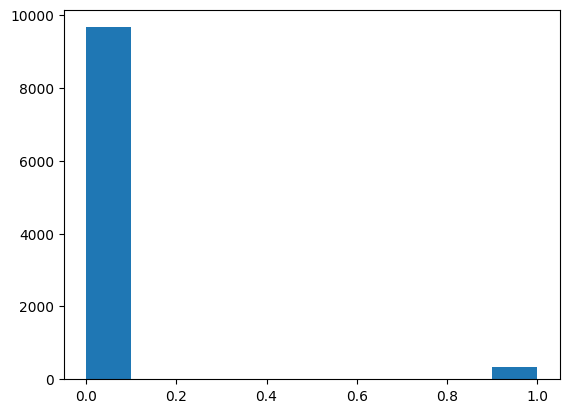

In [5]:
# show the overall machine failure distributions
plt.hist(df['Machine failure'])
plt.show()

<Axes: xlabel='Type', ylabel='count'>

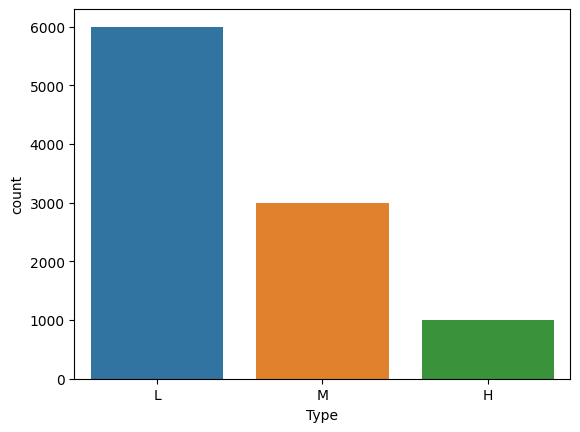

In [6]:
# show the distribution of product types L, M, H
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)

<Axes: title={'center': 'Machine Faulure Rate in Dependence of Product Quality'}, xlabel='Type', ylabel='Machine failure'>

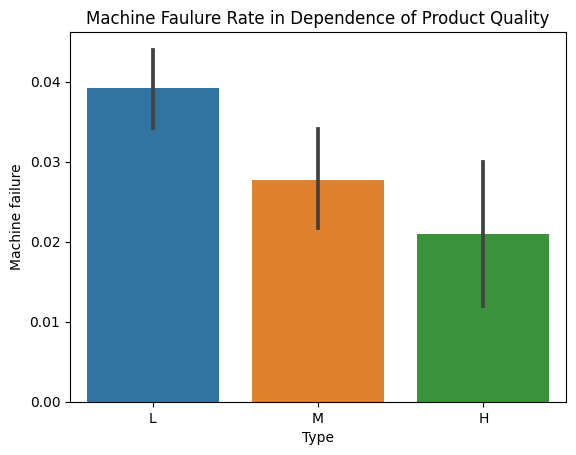

In [7]:
# show the machine failure distributions for the three different product quality categories L, M, H
plt.title('Machine Faulure Rate in Dependence of Product Quality')
sns.barplot(data=df, x='Type', y='Machine failure', order=df['Type'].value_counts().index)

# Machine Learning Modeling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [9]:
# model machine failure based on just the physical parameters
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[features]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [10]:
# separate features and target
X = df[features]
y = df['Machine failure']

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [12]:
clf = LogisticRegression(random_state=123)

In [13]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [14]:
y_pred =clf.predict(X_test)

In [15]:
# Overall accuracy
clf.score(X_test, y_test)

0.9675757575757575

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[3173,   12],
       [  95,   20]], dtype=int64)

## Random Forest

In [17]:
clf = RandomForestClassifier(random_state=123)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [18]:
# Overall accuracy
clf.score(X_test, y_test)

0.98

In [19]:
y_pred =clf.predict(X_test)

In [20]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[3172,   13],
       [  53,   62]], dtype=int64)